In [1]:
import pandas as pd                 # for working with data in Python
import numpy as np
import matplotlib.pyplot as plt     # for visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [4]:
train = pd.read_csv('F:/train.csv')
test = pd.read_csv('F:/test.csv')

In [5]:
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)


Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [6]:
print(train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [7]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [8]:
print (train.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Skew is: 1.8828757597682129


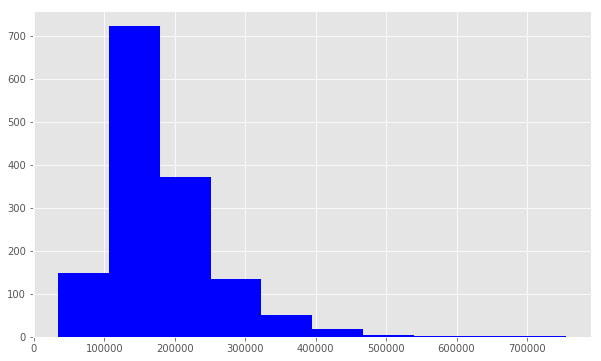

In [9]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()



 Skew is: 0.12133506220520406


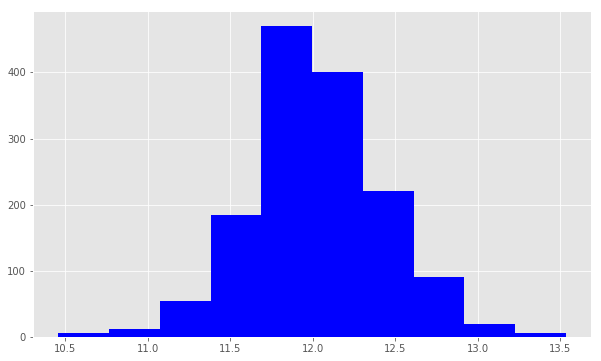

In [10]:
target = np.log(train.SalePrice)
print ("\n Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [11]:
numeric_features = train.select_dtypes(include=[np.number])

In [12]:
print(numeric_features.dtypes)

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object


In [13]:
corr = numeric_features.corr()


In [14]:
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


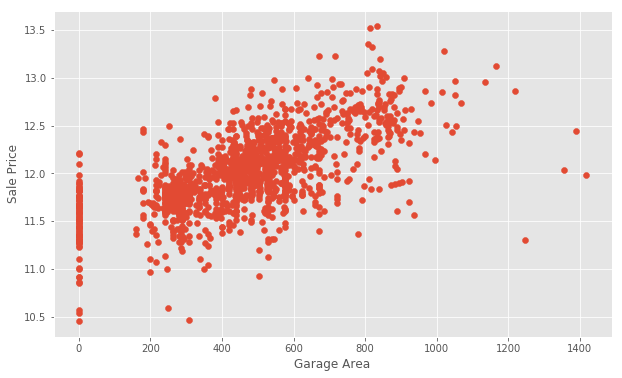

In [15]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()


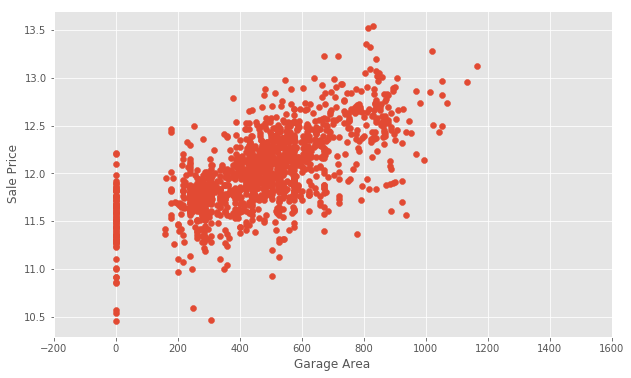

In [16]:
train = train[train['GarageArea'] < 1200]

# display the previous graph again without outliers
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600)     # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()


In [18]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
#nulls
print(nulls)

              Null Count
Feature                 
PoolQC              1449
MiscFeature         1402
Alley               1364
Fence               1174
FireplaceQu          689
LotFrontage          258
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0


In [19]:
categoricals = train.select_dtypes(exclude=[np.number])
#categoricals.describe()
print(categoricals.describe())

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1455    91     1455        1455      1455      1455   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1147   1450    50      921        1309      1454      1048   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1455         1455       1455      ...            1374   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1378          225       1257      ...             867   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1374       1374       1374       1455      6    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Gd  MnPrv   
freq    

In [20]:
print ("Original: \n")
print (train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [21]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)

print ('Encoded: \n')
print (train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


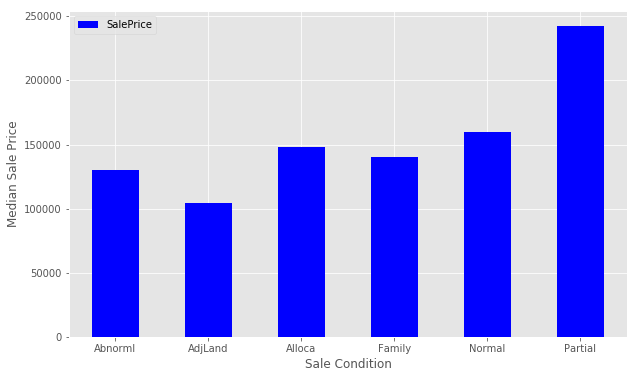

In [22]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [23]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)


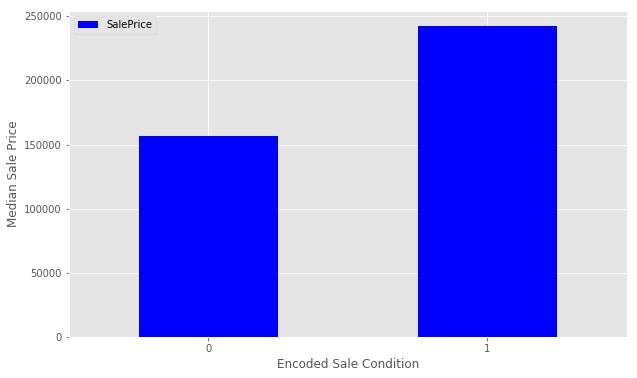

In [24]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()


In [31]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [32]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [34]:
lr = linear_model.LinearRegression()

In [35]:
model = lr.fit(X_train, y_train)

In [36]:
print("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8882477709262508


In [37]:
predictions = model.predict(X_test)

In [38]:
print('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.017841794519568282


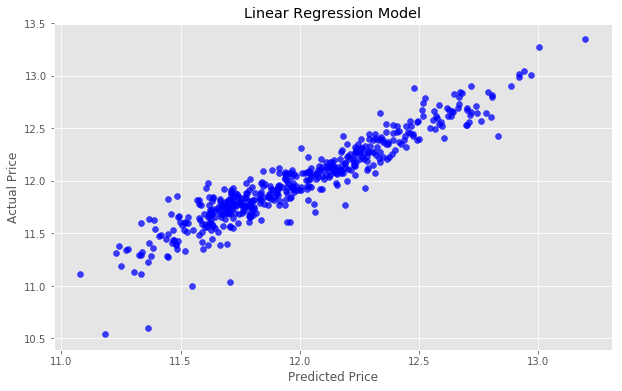

In [39]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()


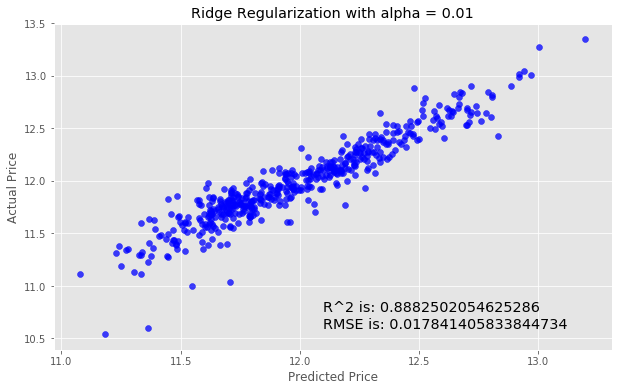

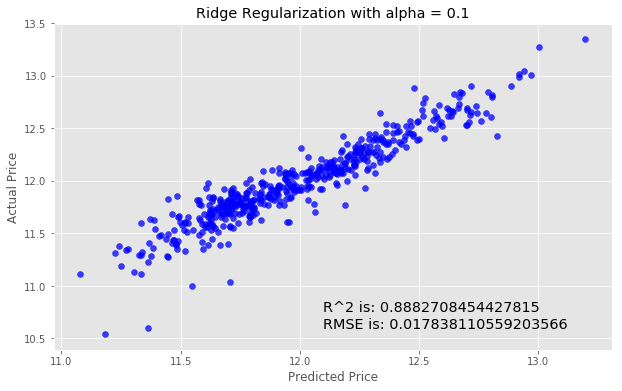

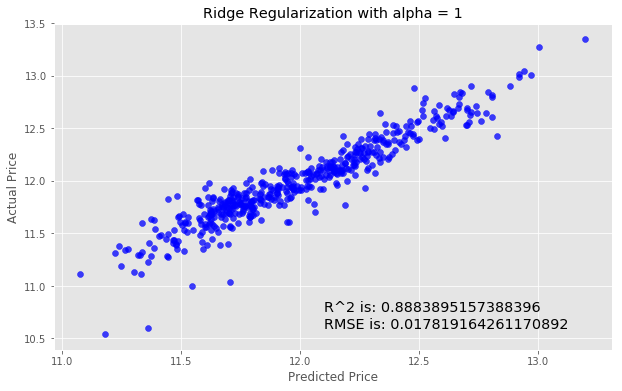

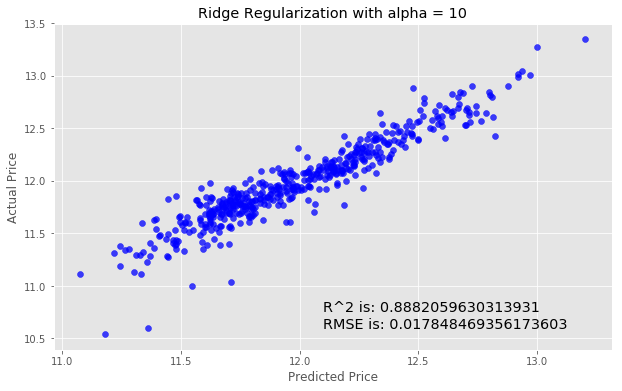

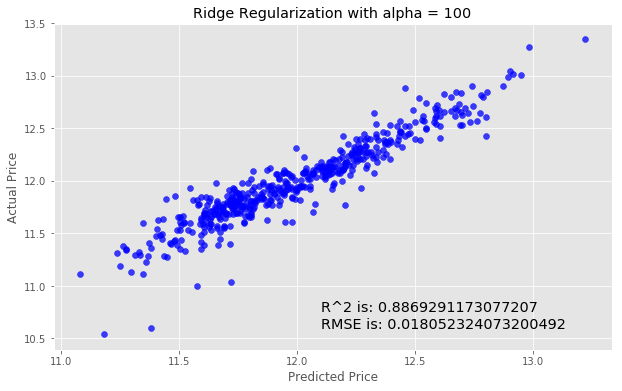

In [40]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [41]:
print("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8882477709262508


In [52]:
submission1 = pd.DataFrame()

In [53]:
submission1['Id'] = test.Id

In [54]:
feats = test.select_dtypes(
    include=[np.number]).drop(['Id'], axis=1).interpolate()

In [55]:
predictions = model.predict(feats)

In [56]:
final_predictions = np.exp(predictions)

In [57]:
print("Original predictions are: \n", predictions[:10], "\n")
print("Final predictions are: \n", final_predictions[:10])

Original predictions are: 
 [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655 12.05709882
 12.16036698 12.01665734 12.17126892 11.66318882] 

Final predictions are: 
 [128959.49172586 122920.74024357 175704.82598101 200050.83263755
 182075.46986405 172318.33397533 191064.621642   165488.55901671
 193158.99133191 116214.02546462]


In [58]:
submission1['SalePrice'] = final_predictions

In [59]:
print(submission1)

        Id      SalePrice
0     1461  128959.491726
1     1462  122920.740244
2     1463  175704.825981
3     1464  200050.832638
4     1465  182075.469864
5     1466  172318.333975
6     1467  191064.621642
7     1468  165488.559017
8     1469  193158.991332
9     1470  116214.025465
10    1471  197517.341364
11    1472  110496.869306
12    1473  104627.958604
13    1474  160048.618595
14    1475  121950.258864
15    1476  346510.345715
16    1477  247172.186045
17    1478  268659.642612
18    1479  258557.802499
19    1480  480282.138184
20    1481  297738.112686
21    1482  199447.039036
22    1483  167917.033537
23    1484  161980.873312
24    1485  184049.475990
25    1486  197557.610154
26    1487  314256.179482
27    1488  244381.740247
28    1489  184648.639192
29    1490  224171.382671
...    ...            ...
1429  2890   84571.751089
1430  2891  130950.644826
1431  2892   68706.125693
1432  2893   97550.392813
1433  2894   52327.908661
1434  2895  283110.783888
1435  2896  

In [60]:
submission1.to_csv('submission1.csv', index=False)